## Introdução

**Detalhamento das Features:**

* `precipitacao total`: quantidade total de chuva acumulada no período, em milímetros (mm).
* `pressao atmos nv estacao`: pressão atmosférica medida ao nível da estação meteorológica, em milibares (mB).
* `pressao atmos max`: maior valor da pressão atmosférica registrado na hora anterior, em milibares (mB).
* `pressao atmos min`: menor valor da pressão atmosférica registrado na hora anterior, em milibares (mB).
* `radiacao`: radiação solar global recebida, em kilojoules por metro quadrado (Kj/m²).
* `temp ar`: temperatura do ar (bulbo seco) no momento da medição, em graus Celsius (°C).
* `temp pronto orvalho`: temperatura do ponto de orvalho (quando o ar fica saturado de vapor d’água), em °C.
* `temp max`: temperatura máxima registrada na hora anterior, em °C.
* `temp min`: temperatura mínima registrada na hora anterior, em °C.
* `temp orvalho max`: valor máximo da temperatura de orvalho registrado na hora anterior, em °C.
* `temp orvalho min`: valor mínimo da temperatura de orvalho registrado na hora anterior, em °C.
* `umidade max`: umidade relativa máxima registrada na hora anterior, em porcentagem (%).
* `umidade min`: umidade relativa mínima registrada na hora anterior, em porcentagem (%).
* `umidade relativa ar`: umidade relativa do ar no momento da medição, em porcentagem (%).
* `vento direcao`: direção do vento no instante da medição, em graus (0–360).
* `vento rajada max`: velocidade da rajada máxima de vento registrada, em metros por segundo (m/s).
* `vento velocidade`: velocidade média do vento no instante da medição, em m/s.
* `dia_do_mes`: número do dia dentro do mês (1 a 31).
* `semana_do_ano`: número da semana dentro do ano (1 a 52).
* `dia_semana_sin`: transformação seno para representar o dia da semana (captura periodicidade sem descontinuidade).
* `dia_semana_cos`: transformação cosseno para representar o dia da semana (complementar ao seno).
* `mes_sin`: transformação seno para representar o mês do ano (captura sazonalidade anual).
* `mes_cos`: transformação cosseno para representar o mês do ano (complementar ao seno).
* `hora_num`: hora do dia em formato numérico (0 a 23).
* `hora_sin`: transformação seno para representar a hora do dia (captura ciclos diários).
* `hora_cos`: transformação cosseno para representar a hora do dia (complementar ao seno).

In [1]:
# Carregando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler

# Configurando gráficos seaborn
sns.set_palette(palette="crest")
sns.set_theme()

In [2]:
df = pd.read_csv("../data/INMET_DF_processado.csv", index_col="data", parse_dates=True)

print(f"Quantidade de linhas: {df.shape[0]}")
print(f"Quantidade de colunas: {df.shape[1]}\n")

df.info(memory_usage='deep')

Quantidade de linhas: 8755
Quantidade de colunas: 26

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8755 entries, 2024-01-01 to 2024-12-31
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   precipitacao total        8755 non-null   float64
 1   pressao atmos nv estacao  8755 non-null   float64
 2   pressao atmos max         8755 non-null   float64
 3   pressao atmos min         8755 non-null   float64
 4   radiacao                  8755 non-null   float64
 5   temp ar                   8755 non-null   float64
 6   temp pronto orvalho       8755 non-null   float64
 7   temp max                  8755 non-null   float64
 8   temp min                  8755 non-null   float64
 9   temp orvalho max          8755 non-null   float64
 10  temp orvalho min          8755 non-null   float64
 11  umidade max               8755 non-null   float64
 12  umidade min               8755 non-null   floa

In [3]:
df.head(4)

,precipitacao total,pressao atmos nv estacao,pressao atmos max,pressao atmos min,radiacao,temp ar,temp pronto orvalho,temp max,temp min,temp orvalho max,...,vento velocidade,dia_do_mes,semana_do_ano,dia_semana_sin,dia_semana_cos,mes_sin,mes_cos,hora_num,hora_sin,hora_cos
data,,,,,,,,,,,,,,,,,,,,,
2024-01-01,0.0,885.7,885.7,885.3,844.6515,22.0,18.2,22.6,21.8,18.6,...,1.5,1,1,0.0,1.0,0.5,0.866025,0,0.000000,1.000000
2024-01-01,0.0,886.7,886.7,885.7,844.6515,21.2,18.6,22.0,21.1,18.7,...,1.5,1,1,0.0,1.0,0.5,0.866025,1,0.258819,0.965926
2024-01-01,0.0,887.1,887.2,886.7,844.6515,20.9,18.8,21.5,20.9,18.9,...,1.1,1,1,0.0,1.0,0.5,0.866025,2,0.500000,0.866025
2024-01-01,0.0,887.1,887.4,887.1,844.6515,20.9,18.3,21.1,20.8,18.9,...,1.5,1,1,0.0,1.0,0.5,0.866025,3,0.707107,0.707107


In [4]:
# análise estatistica geral das features principais
lista_features = df.columns.to_list()
colunas_sem_data = df.drop(columns=lista_features[-9:]).select_dtypes(include='number')
colunas_sem_data.describe()

,precipitacao total,pressao atmos nv estacao,pressao atmos max,pressao atmos min,radiacao,temp ar,temp pronto orvalho,temp max,temp min,temp orvalho max,temp orvalho min,umidade max,umidade min,umidade relativa ar,vento direcao,vento rajada max,vento velocidade
count,8755.000000,8755.000000,8755.000000,8755.000000,8755.000000,8755.000000,8755.000000,8755.000000,8755.000000,8755.000000,8755.000000,8755.000000,8755.000000,8755.000000,8755.000000,8755.000000,8755.000000
mean,0.159749,887.879577,888.126282,887.633124,811.341678,21.978241,14.467756,22.722878,21.273284,15.017807,13.940742,70.397944,64.067390,67.270360,147.371216,4.909115,2.087105
std,1.264249,2.406873,2.382213,2.416875,1044.666691,3.934086,5.134531,4.021806,3.830455,5.087790,5.201116,22.628663,23.133801,22.970979,101.454127,2.076237,0.986977
min,0.000000,880.600000,880.700000,880.500000,0.000000,9.500000,-4.200000,10.400000,9.500000,-3.200000,-5.000000,12.000000,10.000000,11.000000,1.000000,0.700000,0.100000
25%,0.000000,886.200000,886.500000,886.000000,45.200000,19.400000,10.400000,19.800000,19.000000,11.000000,10.000000,54.000000,46.000000,50.000000,79.000000,3.300000,1.300000
50%,0.000000,887.800000,888.000000,887.500000,173.061540,21.500000,16.800000,22.200000,20.800000,17.400000,16.100000,75.000000,66.000000,70.000000,108.000000,4.800000,2.000000
75%,0.000000,889.500000,889.700000,889.300000,1526.550000,24.800000,18.600000,25.700000,23.900000,19.100000,18.200000,91.000000,85.000000,88.000000,212.000000,6.300000,2.800000
max,35.200000,895.200000,895.200000,895.100000,4080.400000,35.400000,21.800000,36.100000,34.200000,22.600000,21.300000,99.000000,98.000000,98.000000,360.000000,18.900000,7.500000


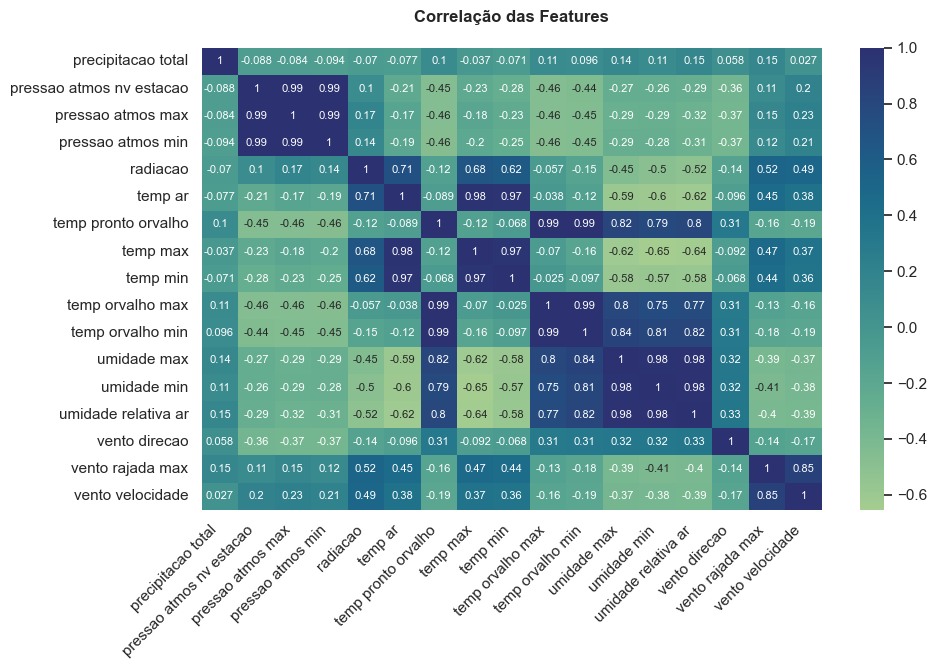

In [5]:
# Mapa de calor das correalações
plt.figure(figsize=(10,6))
sns.heatmap(colunas_sem_data.corr(),
            annot=True,
            annot_kws={'size':8},
            cmap="crest")

plt.xticks(rotation=45, ha='right')
plt.title('Correlação das Features\n', fontweight="bold")

# Plot
plt.show()

O gráfico de correlação revela padrões interessantes e que são esperados em dados meteorológicos:

- **Temperaturas:** As variáveis `temp ar`, `temp max`, `temp min` têm uma correlação quase perfeita. O mesmo acontece com as temperaturas de ponto de orvalho (o que é esperado)

- **Pressão Atmosférica:** As três variáveis de pressão são praticamente idênticas.

- **Umidade:** Todas as umidades também possuem forte correlação entre si.

Deste modo, temos algumas correlações que revelam insights interessantes e relevantes:

- **Radiação vs Temperatura:** A correlação positiva forte entre `radiacao` e `temp ar` de `0.68` é fundamental. Mostra que, como esperado, a radiação solar é um dos principais fatores que aquecem o ar.

- **Temperatura vc Umidade relativa:** A correlação negativa forte entre `temp ar` e `umidade relativa ar` de `-0.62` é um comportamento alto explicativo. Durante o dia, quando a temperatura sobe a umidade tende a cair, e vice versa.

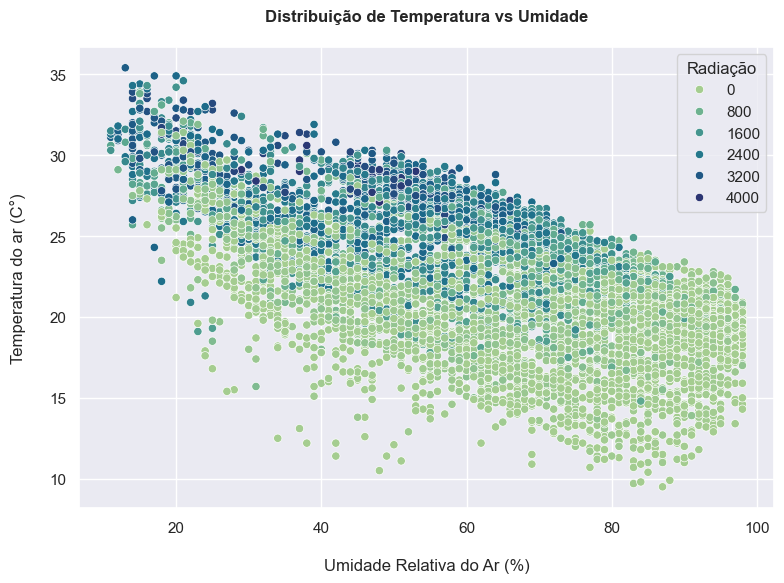

In [22]:
# Grafico de dispersão
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=df["umidade relativa ar"],
    y=df['temp ar'],
    hue=df['radiacao'],
    palette="crest")

plt.title("Distribuição de Temperatura vs Umidade\n", fontweight="bold")
plt.xlabel("\nUmidade Relativa do Ar (%)")
plt.ylabel("Temperatura do ar (C°)\n")
plt.legend(title="Radiação")

# Plot
plt.tight_layout()
plt.show()

Podemos notar que quanto maior a umidade, menor é a temperatura. O que influencia muito à explicar o aumento da radiação solar em temperaturas altas, devida à baixa umidade

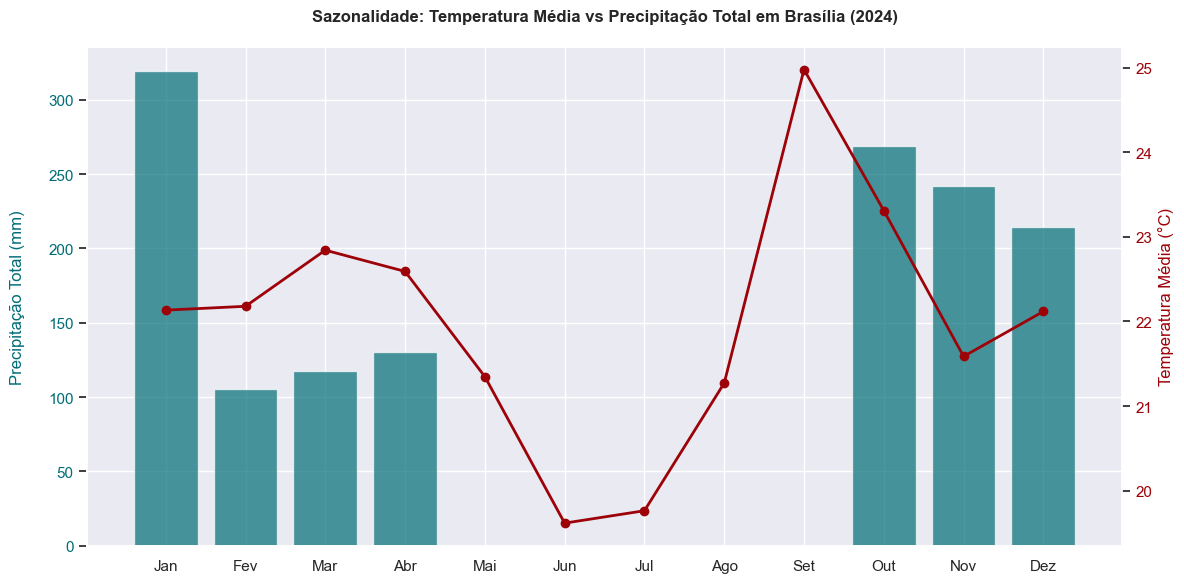

In [11]:
# Agrupando os meses e calculando temperatura e precipitação
df['mes'] = df.index.month 
df_mensal = df.groupby('mes').agg(
    temp_media=('temp ar', 'mean'),
    precipitacao_total=('precipitacao total', 'sum')
).reset_index()

# Grafico combinado
fig, ax1 = plt.subplots(figsize=(12, 6))

# Gráfico de barras para precipitação
color_prec = "#006d77"
ax1.bar(df_mensal['mes'],
        df_mensal['precipitacao_total'],
        color=color_prec,
        alpha=0.7,
        label='Precipitação')

ax1.set_xlabel('')
ax1.set_ylabel('Precipitação Total (mm)\n', color=color_prec)
ax1.tick_params(axis='y', labelcolor=color_prec)
ax1.set_xticks(range(1, 13))
ax1.set_xticklabels(['Jan','Fev','Mar','Abr','Mai','Jun','Jul','Ago','Set','Out','Nov','Dez'])
ax1.grid(True)

# Gráfico de linha para temperatura
color_temp = "#9d0208"
ax2 = ax1.twinx()
ax2.plot(df_mensal['mes'],
         df_mensal['temp_media'],
         color=color_temp,
         marker='o',
         linestyle='-',
         linewidth=2,
         label='Temperatura')

ax2.set_ylabel('Temperatura Média (°C)', color=color_temp)
ax2.tick_params(axis='y', labelcolor=color_temp)
ax2.grid(False)

# Plot
plt.title('Sazonalidade: Temperatura Média vs Precipitação Total em Brasília (2024)\n', fontweight="bold")
fig.tight_layout()
plt.show()

In [24]:
# Definindo um ciclo de maio à setembro
df_epoca_seca = df.loc['2024-05-01':'2024-09-30']

variaveis_para_plotar = ['temp ar', 'radiacao', 'umidade relativa ar']
df_epoca_longo = df_epoca_seca[variaveis_para_plotar].melt(
    ignore_index=False, var_name='variavel', value_name='valor'
)

# Normalizando valores
scaler = MinMaxScaler()
df_scaled = df_epoca_seca[variaveis_para_plotar].copy()
df_scaled[df_scaled.columns] = scaler.fit_transform(df_scaled)

df_scaled_longo = df_scaled.melt(ignore_index=False, var_name="variavel", value_name="valor")

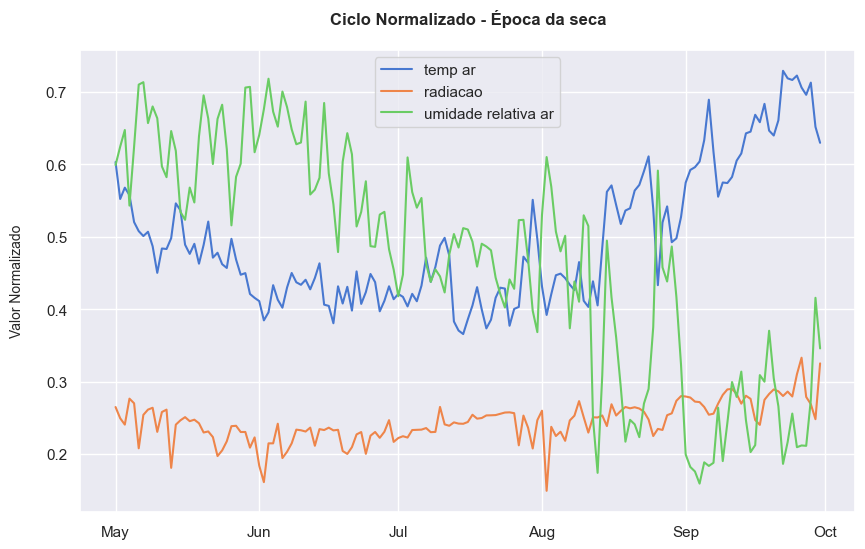

In [25]:
# Gráfico de linha
plt.figure(figsize=(10,6))
sns.lineplot(
    data=df_scaled_longo,
    x=df_scaled_longo.index,
    y="valor",
    hue="variavel",
    errorbar=None,
    palette="muted"
)

plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.title("Ciclo Normalizado - Época da seca\n", fontweight="bold")
plt.ylabel("Valor Normalizado\n", fontsize=10)
plt.xlabel("")

# Plot
plt.legend(title="")
plt.show()